# Instituto Tecnologico de Estudios Superiores de Occidente
### MAESTRIA EN CIENCIA DE DATOS
#### Optimización Convexa

Profesor: Juan Diego Sanchez  

Alumnos:
-   Luis Alfonso Guerrero
-   Alex Medina
-   Roberto Carlos Vazquez
-   Angel Wong

# Example 1: Symbolic Regressor

In [1]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


/var/folders/qz/n1m12d9n5bd0zyrmpkz4_qzm0000gn/T/ipykernel_1073/3215409917.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


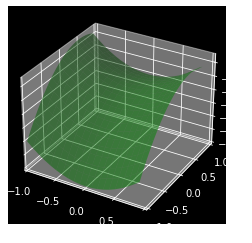

In [2]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [4]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764      3.16m
   1     9.97          1.70233        5         0.320202         0.624787      1.63m
   2     7.72          1.94456       11         0.239537         0.533148      1.37m
   3     5.41         0.990157        7         0.235676         0.719906      1.21m
   4     4.66         0.894443       11         0.103946         0.103946      1.17m
   5     5.41         0.940242       11         0.060802         0.060802      1.02m
   6     6.78          1.09536       11      0.000781474      0.000781474     48.53s


SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [5]:
print(est_gp._program)

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


In [6]:
est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor(n_estimators=10)
est_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

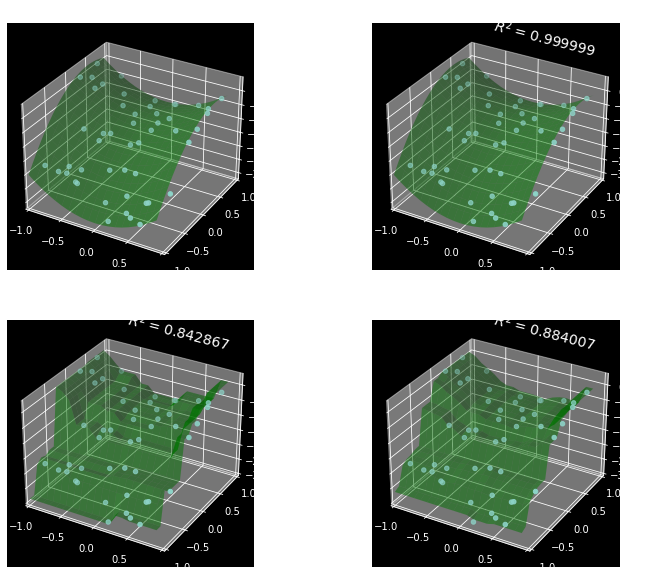

In [7]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()

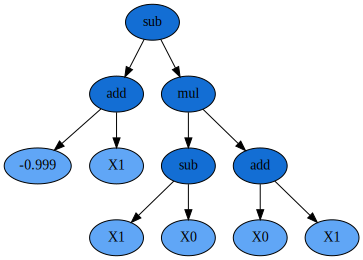

In [8]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

In [9]:
print(est_gp._program.parents)

{'method': 'Crossover', 'parent_idx': 1555, 'parent_nodes': range(1, 4), 'donor_idx': 78, 'donor_nodes': []}


add(-0.999, X1)
Fitness: 0.35180331907500284


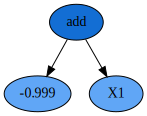

In [10]:
idx = est_gp._program.parents['donor_idx']
fade_nodes = est_gp._program.parents['donor_nodes']
print(est_gp._programs[-2][idx])
print('Fitness:', est_gp._programs[-2][idx].fitness_)
dot_data = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = graphviz.Source(dot_data)
graph

sub(sub(X1, 0.939), mul(sub(X1, X0), add(X0, X1)))
Fitness: 0.17080204042764768


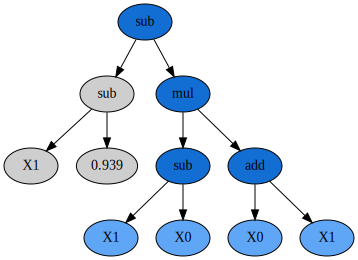

In [11]:
idx = est_gp._program.parents['parent_idx']
fade_nodes = est_gp._program.parents['parent_nodes']
print(est_gp._programs[-2][idx])
print('Fitness:', est_gp._programs[-2][idx].fitness_)
dot_data = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = graphviz.Source(dot_data)
graph

# Example 2: Symbolic Transformer (with explanation notes)

In [12]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state
from sklearn.datasets import load_boston
import numpy as np

In [13]:
#Se reordenan los registros de manera aleatoria.
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

/Users/alexmedina/Documents/DS/2P/ds-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [14]:
from sklearn.linear_model import Ridge
est = Ridge()
est.fit(boston.data[:300, :], boston.target[:300])
print(est.score(boston.data[300:, :], boston.target[300:]))

0.759319453049884


La regresion Ridge es entrenada con los primeros 300 registros reordenados de la base de datos.  

    est = Ridge()
    est.fit(boston.data[:300, :], boston.target[:300])

Se obtiene un resultado de aproximadamente 76% de presicion al realizar la prediccion con los todos los registros posteriores a los 300. 

    print(est.score(boston.data[300:, :], boston.target[300:]))

In [15]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']

gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)

gp.fit(boston.data[:300, :], boston.target[:300])

gp_features = gp.transform(boston.data)

new_boston = np.hstack((boston.data, gp_features))

est = Ridge()
est.fit(new_boston[:300, :], boston.target[:300])
print(est.score(new_boston[300:, :], boston.target[300:]))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.04         0.339876        6         0.822502         0.675124     57.62s
   1     6.91         0.593562        7         0.836993         0.602468     38.57s
   2     5.07         0.730093        8          0.84063         0.704017     36.09s
   3     5.22         0.735525        5         0.847019         0.628351     33.65s
   4     6.24         0.734679       10         0.856612         0.565138     32.98s
   5     8.23         0.721433       18          0.85677         0.728095     32.91s
   6    10.20         0.717937       14         0.875233         0.619693     31.19s
   7    11.84         0.720667       14         0.875927         0.609363     27.55s
   8    12.56         0.733019       27         0.881705         0.390121  

In [16]:
boston.data[:300, :].shape

(300, 13)

In [17]:
gp_features.shape

(506, 10)

In [18]:
new_boston.shape

(506, 23)

Por medio de la clase `SymbolicTransformer` se obtienen 10 nuevas variables que son utilizadas en la regresión Ridge para mejor la precisión.
Pasando de 76% "score" a un 84%. 

Las nuevas variables/características son definidas a base del siguiente grupo de funciones. 

    function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']

Las nuevas características se obtienen transformando toda la información en `boston.data` con base el objeto transformador (`gp`) entrenado con los primeros registros. 

    gp = SymbolicTransformer(generations=20, population_size=2000,
                            hall_of_fame=100, n_components=10,
                            function_set=function_set,
                            parsimony_coefficient=0.0005,
                            max_samples=0.9, verbose=1,
                            random_state=0)

    gp.fit(boston.data[:300, :], boston.target[:300])

    gp_features = gp.transform(boston.data)

`gp_features` es ahora un array de 10 características (definidas por `n_components=10` que fue definido como parámetro del transformador) con 506 registros (uno por cada registro en `boston.data`). 

Las nuevas variables que se crearon con el transformador son agregadas directamente a la base de datos `boston.data` original para apartir de ella volver a hacer la regresión. 

    new_boston = np.hstack((boston.data, gp_features))

Al final se obtiene un dataset de 23 variables (las 13 originales de `boston.data` más las 10 creadas con el transformador `SymbolicTransformer`), con los 506 registros originales. 

Ahora al realizar la nueva regresión Ridge se utilizan las variables originales mas las 10 características (variable `new_boston`) nuevas para crear una regresión con una mejor precisión.

De la misma manera se entrena con los primeros 300 registros y se evalua la presición con los 206 registros restantes. Con la cual la regresión Ridge da el valor de 84% de precisión. 

    est = Ridge()
    est.fit(new_boston[:300, :], boston.target[:300])
    print(est.score(new_boston[300:, :], boston.target[300:]))

En conclusion la transformacion simbolica mejora el valor de $ R^2 $.

# Example 3: Customizing your programs

In [19]:
from gplearn.functions import make_function

In [20]:
def logic(x1, x2, x3, x4):
    return np.where(x1 > x2, x3, x4)

logical = make_function(function=logic,
                        name='logical',
                        arity=4)

In [21]:
function_set = ['add', 'sub', 'mul', 'div', logical]
gp = SymbolicTransformer(generations=2, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)

In [22]:
gp.fit(boston.data[:300, :], boston.target[:300])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    55.28         0.296629        3         0.792393         0.831715     10.18s
   1    10.35         0.533096        3         0.812059         0.673758      0.00s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div',
                    generations=2, max_samples=0.9,
                    parsimony_coefficient=0.0005, population_size=2000,
                    random_state=0, verbose=1)

In [23]:
print(gp._programs[0][906])

sub(logical(X6, add(X11, 0.898), X10, X2), X5)


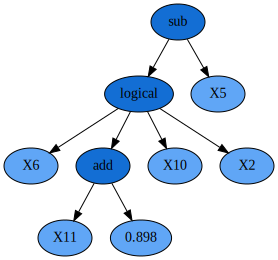

In [24]:
dot_data = gp._programs[0][906].export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex3_fig1', format='png', cleanup=True)
graph

# Example 4: Classification

In [25]:
from gplearn.genetic import SymbolicClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

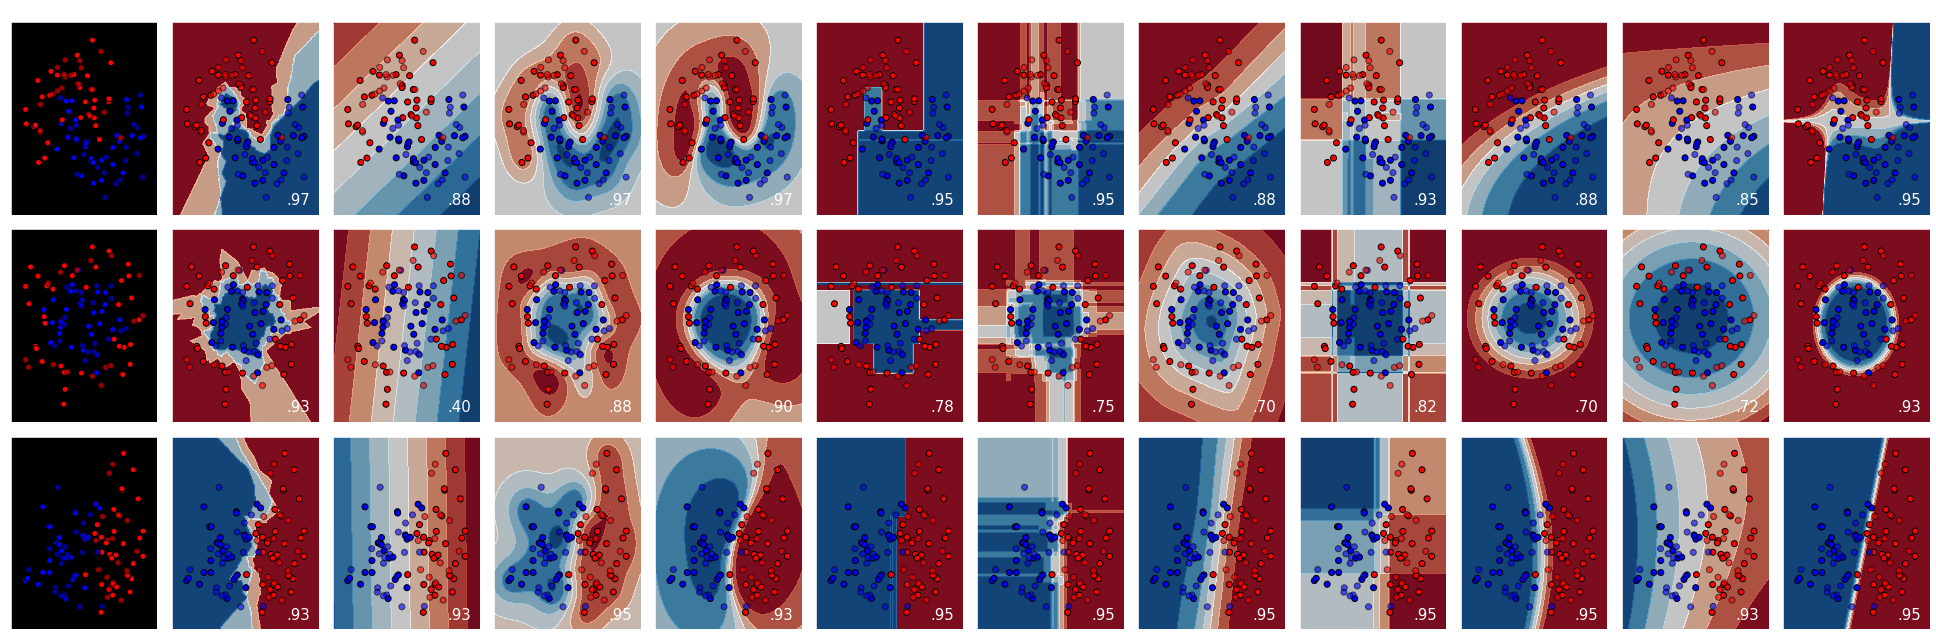

In [26]:
# Modified from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "SymbolicClassifier"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, tol=0.001),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SymbolicClassifier(random_state=0)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [27]:
rng = check_random_state(0)
cancer = load_breast_cancer()
perm = rng.permutation(cancer.target.size)
cancer.data = cancer.data[perm]
cancer.target = cancer.target[perm]

In [28]:
est = SymbolicClassifier(parsimony_coefficient=.01,
                         feature_names=cancer.feature_names,
                         random_state=1)
est.fit(cancer.data[:400], cancer.target[:400])

SymbolicClassifier(feature_names=array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
                   parsimony_coefficient=0.01, random_state=1)

In [29]:
y_true = cancer.target[400:]
y_score = est.predict_proba(cancer.data[400:])[:,1]
roc_auc_score(y_true, y_score)

0.9693786982248521

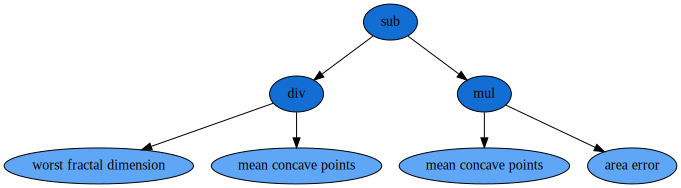

In [30]:
dot_data = est._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex4_tree', format='png', cleanup=True)
graph

In [3]:
import session_info
session_info.show()
